<img src = "Capture.PNG">  
  
  # Income Classification  

### Description
  
###### Listing of attributes:

**Target feature:** **income :** >50K or <=50K.

- **age**: continuous.  
- **workclass**: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.  
- **fnlwgt**: final weight. In other words, this is the number of people the census believes the entry represents.. (Integer greater than 0)  
- **education**: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.  
- **education-num**: he highest level of education achieved in numerical form (Integer greater than 0)

- **marital-status**: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.  
- **occupation**: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.  
- **relationship**: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- **race**: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- **sex**: Female, Male.   
- **capital-gain**: capital gains for an individual
- **capital-loss**: capital loss for an individual  
- **hours-per-week**: the hours an individual has reported to work per week  
- **native-country**: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

In [1]:
# Importation des librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [4]:
# Importation de la base de données sous forme de dataframe
df = pd.read_csv("DataSet/income_evaluation.csv", sep = ',')
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
# La taille du dataframe
df.shape

(32561, 15)

## Découvrons notre base de données !¶  
  
Dans cette partie on va essayer de comprendre nos donner, analyser chaque variable et décortiquer ses modalités 

In [6]:
# le nombre des valeurs non-nulles et le type de chaque variable
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlwgt          32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  32561 non-null  object
 14   income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
# Calculs statistiques des variables numériques
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


Text(0.5, 1.0, 'Les differents ages des individues')

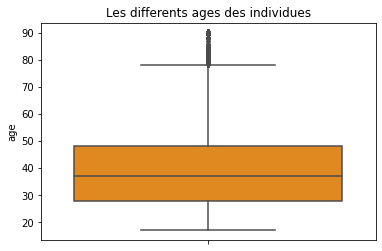

In [8]:
# Distribution d'age 
sn.boxplot(y = "age", data = df, color = "darkorange")
plt.title("Les differents ages des individues")

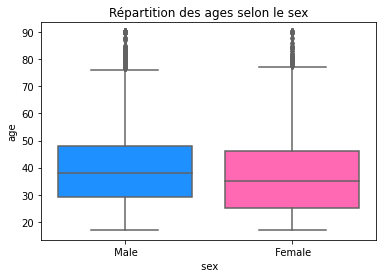

In [9]:
# Répartition des ages selon le sex
ax1 = sn.boxplot(x = " sex", y = "age", data = df, palette = "Accent")
plt.title("Répartition des ages selon le sex")
mybox1 = ax1.artists[0] 
mybox2 = ax1.artists[1] 
# Changer les couleurs des boxs 
mybox1.set_facecolor('dodgerblue') 
mybox2.set_facecolor('hotpink') 
plt.show() 

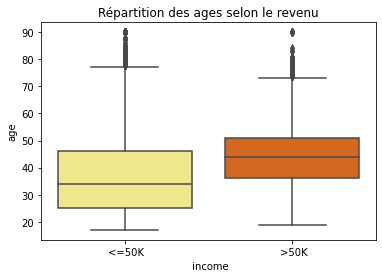

In [10]:
# Répartition des ages selon le revenu
ax2 = sn.boxplot(x = " income", y = "age", data = df, palette = "Set1")
plt.title("Répartition des ages selon le revenu")
mybox1 = ax2.artists[0] 
mybox2 = ax2.artists[1] 
# Change the appearance of that box 
mybox1.set_facecolor('khaki') 
mybox2.set_facecolor('chocolate') 
plt.show()

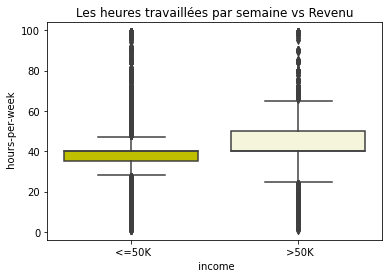

In [12]:
# Répartition des heures de travail selon le revenu
ax3 = sn.boxplot(x = " income", y = " hours-per-week", data = df)
plt.title("Les heures travaillées par semaine vs Revenu")
mybox1 = ax3.artists[0] 
mybox2 = ax3.artists[1] 
# Change the appearance of that box 
mybox1.set_facecolor('y') 
mybox2.set_facecolor('beige') 
plt.show()

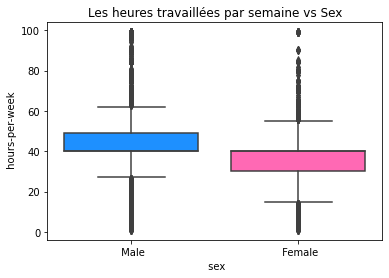

In [13]:
# Répartition des heures de travail selon le sex
ax4 = sn.boxplot(x = " sex", y = " hours-per-week", data = df)
plt.title("Les heures travaillées par semaine vs Sex")
mybox1 = ax4.artists[0] 
mybox2 = ax4.artists[1] 
# Change the appearance of that box 
mybox1.set_facecolor('dodgerblue') 
mybox2.set_facecolor('hotpink') 
plt.show()

In [281]:
# les modalités des variables qualitatives
for i in df.columns:
    if df[i].dtype == "O":
        print(df[i].value_counts())

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name:  workclass, dtype: int64
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name:  education, dtype: int64
 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name:  marital-status, dtype: int64
 Prof-specialty       4140
 Craft-repair         4099
 Exec-manager

In [282]:
# Detection des valeurs manquantes
df.replace(" ?", np.nan, inplace = True)
df.isnull().sum()

age                   0
 workclass         1836
 fnlwgt               0
 education            0
 education-num        0
 marital-status       0
 occupation        1843
 relationship         0
 race                 0
 sex                  0
 capital-gain         0
 capital-loss         0
 hours-per-week       0
 native-country     583
 income               0
dtype: int64

Text(0.5, 1.0, "Nombre d'individus selon leurs revenus et leurs relations")

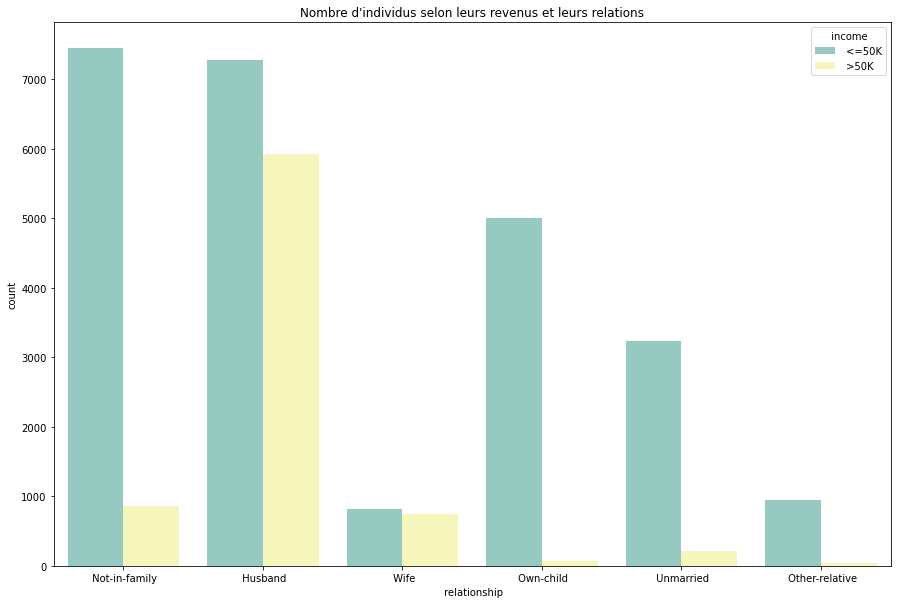

In [21]:
# Nombre d'individus selon leurs revenus et leur relations
plt.figure(figsize = (15, 10))
sn.countplot(x = " relationship", data = df, hue = " income", palette = "Set3")
plt.title("Nombre d'individus selon leurs revenus et leurs relations")


Text(0.5, 1.0, "Nombre d'individus selon leurs revenus et leur education")

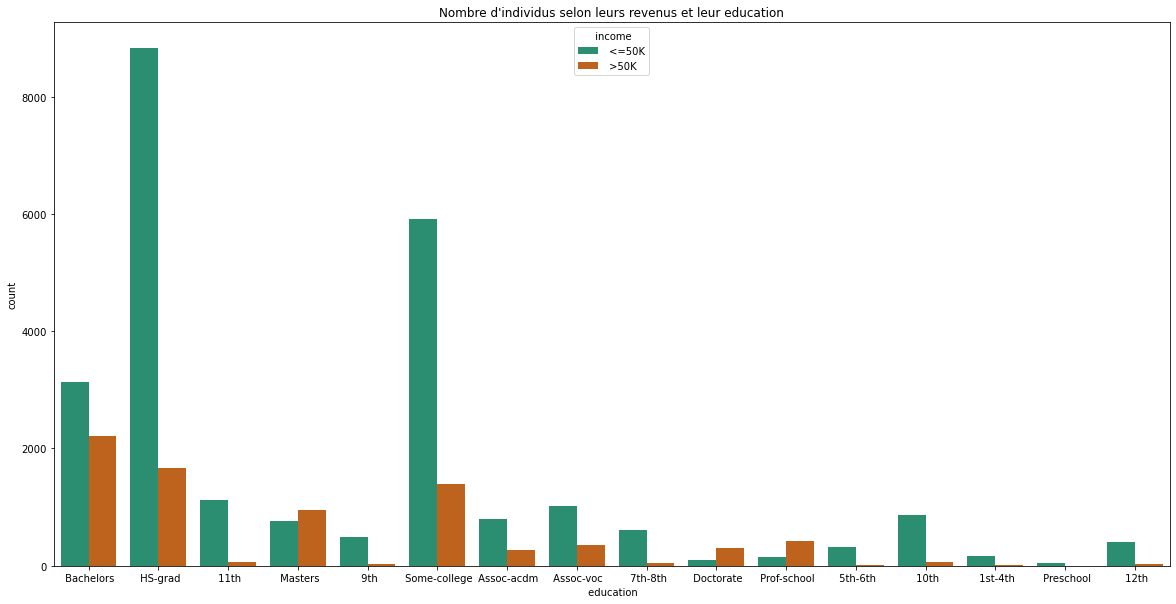

In [24]:
# Nombre d'individus selon leurs revenus et leur education
plt.figure(figsize = (20, 10))
sn.countplot(x = " education", data = df, hue = " income", palette = "Dark2" )
plt.title("Nombre d'individus selon leurs revenus et leur education")

## Data preprocessing 

In [26]:
# Supprimer les lignes avec des valeurs manquantes
df.dropna(subset = [" occupation", " workclass", " native-country"], axis = 0, inplace = True)

# la variable "education" est déjà encodé par la varible "education_num"
# La variable "fnlwgt" n'a pas d'effet sur le revenu
df.drop([" fnlwgt", " education"], axis=1, inplace=True)
df.shape

(32561, 13)

In [29]:
# Codes les variables qualitatives
le = preprocessing.LabelEncoder()
for i in df.columns:
    if df[i].dtype == "O":
        df[i] = le.fit_transform(df[i])

In [30]:
# Nouvelle base de données prête pour traitement
df.head()

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,7,13,4,1,1,4,1,2174,0,40,39,0
1,50,6,13,2,4,0,4,1,0,0,13,39,0
2,38,4,9,0,6,1,4,1,0,0,40,39,0
3,53,4,7,2,6,0,2,1,0,0,40,39,0
4,28,4,13,2,10,5,2,0,0,0,40,5,0


In [31]:
# Spliter les données en train/test
y = df[" income"]
x = df.drop(' income',axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
x_train.head()

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
5514,33,2,13,4,10,1,4,0,0,0,50,39
19777,36,4,11,2,4,0,4,1,0,1887,50,39
10781,58,6,5,5,3,1,4,1,0,0,40,39
32240,21,4,11,2,5,0,4,1,0,0,46,39
9876,27,4,10,0,8,1,4,1,0,0,40,39


## Modeling

### SVM

In [34]:
S = svm.SVC()
S.fit(x_train, y_train)
y_pred_svm = S.predict(x_test)
print("The accuracy score using SVM est:", accuracy_score(y_test, y_pred_svm)) 

The accuracy score using SVM est: 0.806540764624597


### Logistic Regression

In [45]:
lg = LogisticRegression()
lg.fit(x_train, y_train)
y_pred_lg = lg.predict(x_test)
print("The accuracy score using Logistic Regrission est:", accuracy_score(y_test, y_pred_lg)) 


The accuracy score using Logistic Regrission est: 0.8062336864732075


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Decision Tree

In [46]:
DTC = DecisionTreeClassifier(random_state = 42)
DTC.fit(x_train, y_train)
y_pred_dtree = DTC.predict(x_test)
print("The accuracy score using Decision tree est:", accuracy_score(y_test, y_pred_dtree)) 

The accuracy score using Decision tree est: 0.8171349608475357


[Text(418.5, 356.7375, ' relationship <= 0.5\ngini = 0.366\nsamples = 26048\nvalue = [19778, 6270]\nclass = =<50k'),
 Text(209.25, 254.8125, ' education-num <= 12.5\ngini = 0.495\nsamples = 10603\nvalue = [5855, 4748]\nclass = =<50k'),
 Text(104.625, 152.8875, ' capital-gain <= 5095.5\ngini = 0.442\nsamples = 7420\nvalue = [4972, 2448]\nclass = =<50k'),
 Text(52.3125, 50.96249999999998, '\n  (...)  \n'),
 Text(156.9375, 50.96249999999998, '\n  (...)  \n'),
 Text(313.875, 152.8875, ' capital-gain <= 5095.5\ngini = 0.401\nsamples = 3183\nvalue = [883, 2300]\nclass = >50'),
 Text(261.5625, 50.96249999999998, '\n  (...)  \n'),
 Text(366.1875, 50.96249999999998, '\n  (...)  \n'),
 Text(627.75, 254.8125, ' capital-gain <= 7073.5\ngini = 0.178\nsamples = 15445\nvalue = [13923, 1522]\nclass = =<50k'),
 Text(523.125, 152.8875, ' relationship <= 4.5\ngini = 0.144\nsamples = 15093\nvalue = [13911, 1182]\nclass = =<50k'),
 Text(470.8125, 50.96249999999998, '\n  (...)  \n'),
 Text(575.4375, 50.9624

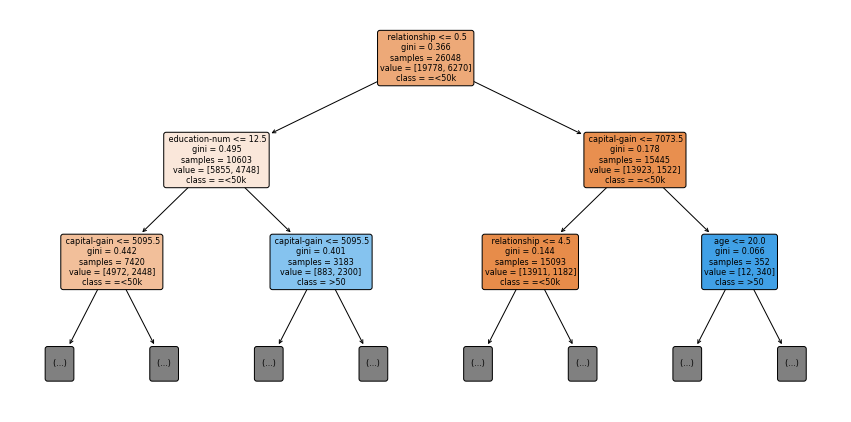

In [37]:
# Visualisation de l'arbre de classifivation
plt.figure(figsize = (15, 7.5))
plot_tree(DTC, max_depth = 2,
         filled = True,
         rounded = True,
         class_names = ["=<50k", ">50"],
         feature_names = x_train.columns)

In [47]:
# Elagage de l'arbre de decision
DTC2 = DecisionTreeClassifier(criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=10, min_samples_leaf=5,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=14, splitter='random')
DTC2.fit(x_train, y_train)
y_pred_dtree2 = DTC2.predict(x_test)
print("The accuracy score using Decision Tree est:", accuracy_score(y_test, y_pred_dtree2))

The accuracy score using Decision Tree est: 0.8248119146322739


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "


[Text(401.0625, 373.72499999999997, 'age <= 35.579\ngini = 0.366\nsamples = 26048\nvalue = [19778, 6270]\nclass = =<50k'),
 Text(209.25, 305.775, ' education-num <= 13.105\ngini = 0.201\nsamples = 11941\nvalue = [10588, 1353]\nclass = =<50k'),
 Text(139.5, 237.825, ' sex <= 0.933\ngini = 0.18\nsamples = 11459\nvalue = [10310, 1149]\nclass = =<50k'),
 Text(69.75, 169.87499999999997, 'gini = 0.102\nsamples = 4315\nvalue = [4083, 232]\nclass = =<50k'),
 Text(209.25, 169.87499999999997, 'gini = 0.224\nsamples = 7144\nvalue = [6227, 917]\nclass = =<50k'),
 Text(279.0, 237.825, 'gini = 0.488\nsamples = 482\nvalue = [278, 204]\nclass = =<50k'),
 Text(592.875, 305.775, ' capital-gain <= 7949.294\ngini = 0.454\nsamples = 14107\nvalue = [9190, 4917]\nclass = =<50k'),
 Text(523.125, 237.825, ' education-num <= 11.683\ngini = 0.437\nsamples = 13538\nvalue = [9181, 4357]\nclass = =<50k'),
 Text(348.75, 169.87499999999997, ' capital-gain <= 4460.162\ngini = 0.355\nsamples = 9428\nvalue = [7256, 2172

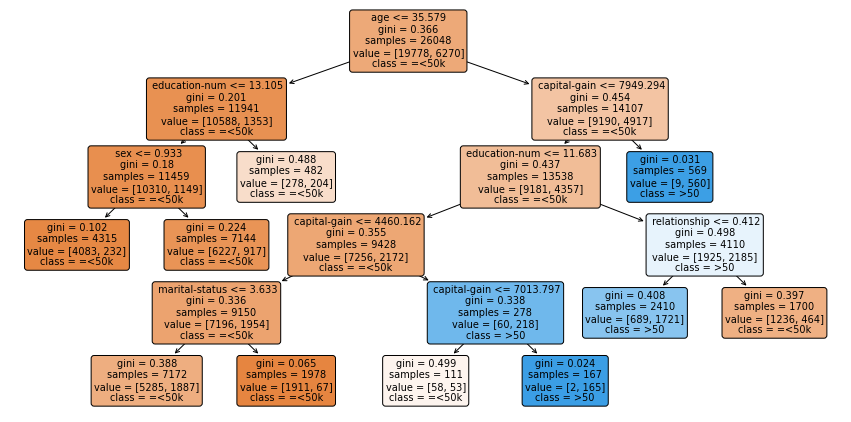

In [44]:
# Visualisation de l'arbre
plt.figure(figsize = (15, 7.5))
plot_tree(DTC2, max_depth = 5,
         filled = True,
         rounded = True,
         class_names = ["=<50k", ">50"],
         feature_names = x_train.columns)

### Random Forest

In [311]:
# Random Forest avec plusieus paramètres

for j in (50, 60, 70, 80, 90, 100):
    l = []
    for i in range (2,20):
        rf = RandomForestClassifier(n_estimators = j, min_samples_split = i ,min_samples_leaf = 3,
                               random_state = 42)
        #Et on lance le training sur notre dataset de train
        rf.fit(x_train, y_train)
        y_pred_rf = rf.predict(x_test)
        l.append(accuracy_score(y_test, y_pred_rf))
    print(f"the accuracy for n_estimators = {j} is", max(l))

the accuracy for n_estimators = 50 is 0.8644123984750539
the accuracy for n_estimators = 60 is 0.8649096635173213
the accuracy for n_estimators = 70 is 0.8639151334327864
the accuracy for n_estimators = 80 is 0.8640808884468755
the accuracy for n_estimators = 90 is 0.863583623404608
the accuracy for n_estimators = 100 is 0.8637493784186971


# Résultat
  
  Le modèle le plus adéquat pour prédire les revenus d'un individue est le **Random Forest** en choisissant 60 arbres comme argument